## Zaawansowane Metody Inteligencji Obliczeniowej
# Zadanie domowe 2
### Prowadzący: Michał Kempka, Marek Wydmuch
### Autor: Michał Ciesielski 145325

## Wprowadzenie

Całe zadanie jest oparte o różne wersje środowiska `FrozenLake` ze znanej biblioteki OpenAI Gym (https://gym.openai.com), która agreguje różnego rodzaju środowiska pod postacią jednego zunifikowanego API.

Zapoznaj się z opisem środowiska (https://gym.openai.com/envs/FrozenLake-v0), a następnie zapoznaj się z kodem poniżej. Pokazuje on podstawy użytkowania API biblioteki Gym.

#### Uwaga: Możesz dowolnie modyfikować elementy tego notebooka (wstawiać komórki i zmieniać kod) o ile nie napisano gdzieś inaczej.

In [1]:
# Zainstaluj bibliotekę OpenAI Gym w wersji 0.18.0
!pip install gym==0.18.0

In [26]:
# Zaimportuj środowisko FrozenLake z OpenAI Gym
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv 

# Stwórzmy deterministyczne (`is_slippper=False`) środowisko w oparciu o jedną z zpredefiniowanych map (`map_name="4x4"`)
env = FrozenLakeEnv(map_name="4x4", is_slippery=False) 

# Po stworzeniu środowiska musimy je zresetować 
env.reset()
# W każdym momencie możemy wyświetlić stan naszego środowiska przy użyciu fukcji `render`
env.render()


SFFF
FHFH
FFFH
HFFG


In [27]:
from pprint import pprint

# Najważniejsze pola środowiska, na potrzeby tego zadania załóżmy, że mamy dostęp do nich wszystkich 
# (oczywiście dla niektórych środowisk w OpenAI Gym tak nie jest)
print("Przestrzeń akcji: ", env.action_space) # Akcje od 0 do 3: LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3
print("Przestrzeń obserwacji: ", env.observation_space) # Stany od 0 do 15
print("Opis środowiska (mapa):")
print(env.desc)
print("Model przejść w środowisku:")
pprint(env.P) # gdzie P[s][a] == [(probability, nextstate, reward, done), ...]
print("Aktualny stan: ", env.s)

Przestrzeń akcji:  Discrete(4)
Przestrzeń obserwacji:  Discrete(16)
Opis środowiska (mapa):
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
Model przejść w środowisku:
{0: {0: [(1.0, 0, 0.0, False)],
     1: [(1.0, 4, 0.0, False)],
     2: [(1.0, 1, 0.0, False)],
     3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
     1: [(1.0, 5, 0.0, True)],
     2: [(1.0, 2, 0.0, False)],
     3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
     1: [(1.0, 6, 0.0, False)],
     2: [(1.0, 3, 0.0, False)],
     3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
     1: [(1.0, 7, 0.0, True)],
     2: [(1.0, 3, 0.0, False)],
     3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
     1: [(1.0, 8, 0.0, False)],
     2: [(1.0, 5, 0.0, True)],
     3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
     1: [(1.0, 5, 0, True)],
     2: [(1.0, 5, 0, True)],
     3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)

In [28]:
# Nasz agent może wejść w interakcje ze środowiskiem  poprzez wywołanie funkcji `step(action)`, 
# gdzie `action` to jedna z możliwych akcji (int od 0 do env.action_space.n - 1)
s = env.reset() # `reset()` zwraca początkowy stan
env.render()
for i in range(5):
    # Wybierzmy losową akcje
    random_a = env.action_space.sample() 
    # `step(action)` zwraca nowy stan (`s`), nagrodę (`r`), informację czy stan jest terminalny (`term`) 
    # oraz dodatkowe informacje, które pomijamy
    # w tym wypadku nowy stan to jedynie id, ale dla innych środowisk może być to innym typ reprezentujący obserwację
    s, r, term, _ = env.step(random_a) 
    env.render()
    if term:
        break


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


## Zad. 1 - Policy iteration + value iteration (10 pkt.)

W komórkach poniżej zaimplementuj algorytmy **iteracji polityki** oraz **iteracji wartości**, wyznaczające deterministyczną politykę dla środowiska FrozenLake.

Odpowiedź na pytania wykonując odpowiednie eksperymenty (zostaw output odpowiednich komórek na poparcie swoich twierdzeń):
- Jak zmiana współczynniku `gamma` wpływa na wynikową politykę?
- Jak stochastyczność wpływa na liczbę iteracji potrzebnych do zbiegnięcia obu algorytmów oraz wynikową politykę?

#### Uwaga: nie zmieniaj nazwy funkcji `policy_iteration` i `value_iteration`, ani ich argumentów. Nie dopisuj do komórek z funkcjami innego kodu. Może zdefiniować funkcje pomocnicze dla danej funkcji w tej samej komórce (sprawdzarka wyciągnie ze zgłoszonego notebooka wyłącznie komórki zawierającą funkcje `policy_iteration` i `value_iteration` do sprawdzenia, kod w innych komórkach nie będzie widziany przez sprawdzarkę!)

- Dla mniejszych wartości współczynnika `gamma` wynikowa polityka osiąga lepsze nagrody w środowisku niedeterministycznym. Natomiast w środowisku deterministycznym, jej wartość nie ma większego znaczenia.
- Stochastyczność sprawia, że liczba iteracji potrzebnych do zbiegnięcia obu algorytmów rośnie. Pomimo większego tempa wzrostu iteracji, wartości wynikowej polityki dla obu algorytmów zbiegają dla większych wartości `gamma` oraz osiągają dużo gorsze wartości (nagrody).

In [29]:
import numpy as np

def policy_iteration(P, gamma, delta=0.001):
    """
    Argumenty:
        P - model przejścia, gdzie P[s][a] == [(probability, nextstate, reward, done), ...]
        gamma - współczynnik dyskontujący
        delta - tolerancja warunku stopu
    Zwracane wartości:
        V - lista o długości len(P) zawierający oszacowane wartość stanu s: V[s]
        pi - lista o długości len(P) zawierający wyznaczoną deterministyczną politykę - akcję dla stanu s: pi[s]
        i - ilość iteracji algorytmu po wszystkich stanach
    """
    V = [0] * len(P)
    pi = [0] * len(P)
    i = 0
    
    # Miejsce na twoją implementację
    while True:
        while True:
            i += 1
            delta_d = 0
            for s in P:
                v = V[s]
                V[s] = sum(p * (r + gamma * V[s_next]) for p, s_next, r, _ in P[s][pi[s]])
                delta_d = max(delta_d, abs(v - V[s]))
            if delta_d < delta:
                break
        stop = True
        for s in P:
            a = pi[s]
            pi[s] = np.argmax([sum(p * (r + gamma * V[s_next]) for p, s_next, r, _ in P[s][a]) for a in P[s]])
            if a != pi[s]:
                stop = False
        if stop:
            break
    
    return V, pi, i

In [30]:
def value_iteration(P, gamma, delta=0.001):
    """
    Argumenty:
        P - model przejścia, gdzie P[s][a] == [(probability, nextstate, reward, done), ...]
        gamma - współczynnik dyskontujący
        delta - tolerancja warunku stopu
    Zwracane wartości:
        Q - lista o długości len(P) zawierający listy z oszacowanymi wartościami dla stanu s i akcji a: Q[s][a]
        pi - lista o długości len(P) zawierający wyznaczoną deterministyczną politykę - akcję dla stanu s: pi[s]
        i - ilość iteracji algorytmu po wszystkich stanach
    """
    pi = [0] * len(P)
    Q = [[0] * len(P[s]) for s in P.keys()]
    V = [0] * len(P)
    i = 0
    
    # Miejsce na twoją implementację
    while True:
        i += 1
        delta_d = 0
        for s in P:
            v = V[s]
            V[s] = max([sum(p * (r + gamma * V[s_next]) for p, s_next, r, _ in P[s][a]) for a in P[s]])
            for a in P[s]:
                Q[s][a] = sum(p * (r + gamma * max(Q[s_next])) for p, s_next, r, _ in P[s][a])
            delta_d = max(delta_d, abs(v - V[s]))
        if delta_d < delta:
            break
    
    for s in P:
        pi[s] = np.argmax([sum(p * (r + gamma * V[s_next]) for p, s_next, r, _ in P[s][a]) for a in P[s]])
    
    return Q, pi, i

In [31]:
# Przykładowy kod do testowania zaimplementowanych metod

# Zaimportuj generator map dla środowiska FrozenLake z OpenAI Gym
from gym.envs.toy_text.frozen_lake import generate_random_map

# Wygeneruj losową mapę jeziora o zadanym rozmiarze (`size=`)
lake_map = generate_random_map(size=8)

# Stwórz środowisko w oparciu o wygenerowaną mapę, 
# sprawdz deterministyczną (`is_slippery=False`) jak i stochastyczną wersję środowiska (`is_slippery=True`)
env = FrozenLakeEnv(desc=lake_map, is_slippery=True)
env.reset()
env.render()


SFFFFFHF
FFFFFFFF
HHFFFFFF
FFFFFFFF
FFFFFHFF
FFHFFFFF
FHFHHFFF
FFFHFFFG


In [32]:
V, pi1, i = policy_iteration(env.P, 0.9)
Q, pi2, i = value_iteration(env.P, 0.9)

In [33]:
# Wprowadzmy teraz funkcję, które empirycznie zewauluje naszą politykę
# po prostu rozgrywając odpowiednią liczbę episodów zgodnie z naszą polityką.
def evaluate_empiricaly(env, pi, episodes=1000, max_actions=100):
    mean_r = 0
    for e in range(episodes):
        s = env.reset()
        total_r = 0
        for _ in range(max_actions): # Na wypadek polityki, która nigdy nie dojdzie od stanu terminalnego
            s, r, final, _ = env.step(pi[s])
            total_r += r
            if final:
                break
        mean_r = mean_r + 1/(e + 1) * (total_r - mean_r)
    return mean_r       

In [36]:
evaluate_empiricaly(env, pi1)

0.8149999999999998

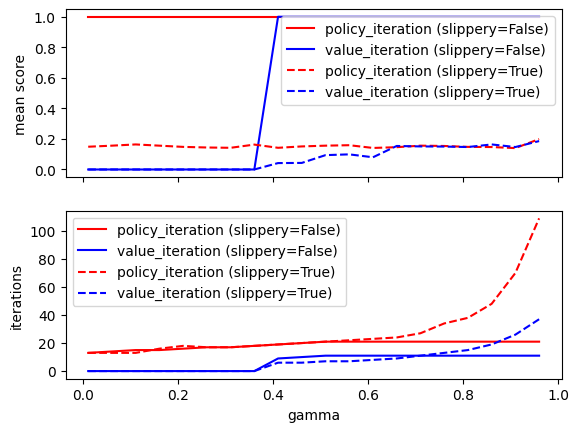

In [21]:
import matplotlib.pyplot as plt

lake_map = generate_random_map(size=6)
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
gammas_list = np.arange(0.01, 1, 0.05)

for line, slippery in [('-', False), ('--', True)]:
    env = FrozenLakeEnv(desc=lake_map, is_slippery=slippery)
    for color, func in [('r', policy_iteration), ('b', value_iteration)]:
        scores, iters = [], []
        for gamma in gammas_list:
            score, iter = 0, 0
            for _ in range(10):
                _, pi, i = func(env.P, gamma)
                s = evaluate_empiricaly(env, pi)
                if s > score:
                    score, iter = s, i
                    if not slippery:
                        break
            scores.append(score)
            iters.append(iter)
        ax1.plot(gammas_list, scores, ls=line, color=color, label=f'{func.__name__} (slippery={slippery})')
        ax2.plot(gammas_list, iters, ls=line, color=color, label=f'{func.__name__} (slippery={slippery})')

ax1.set_ylabel('mean score')
ax2.set_ylabel('iterations')
ax2.set_xlabel('gamma')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
plt.show()

## Zad. 2 - Monte Carlo (10 pkt.)
W komórce poniżej zaimplementuj metodę **On-policy Monte Carlo** dla polityki epsilon-greedy.
Zakładamy, że model przejść nie jest w tym wypadku dla nas dostępny,
dlatego możesz używać wyłącznie metod `env.reset()` i `env.step()`
w swojej implementacji, w celu wygenerowania nowego epizodu.

- Zaproponuj warunek stopu dla swojej implementacji.
- Jaki jest wpływ epsilony na działanie algorytmu?
- Jaka prosta modyfikacja nagród środowiska przyśpieszyłaby odkrywanie dobrej polityki? Zmodyfikuj env.P i zademonstruj.

Tip: z racji, że env.P jest dostępne, możesz porównać wyniki `on_policy_eps_greedy_monte_carlo` ze wynikami `value_iteration`. 

#### Uwaga: nie zmieniaj nazwy funkcji `on_policy_eps_greedy_monte_carlo`, ani jej pierwszych argumentów (możesz dodać nowe argumenty z wartościami domyślnymi). Nie dopisuj do komórki z funkcją innego kodu. Może zdefiniować funkcje pomocnicze dla funkcji w tej samej komórce (sprawdzarka wyciągnie ze zgłoszonego notebooka wyłącznie komórkę zawierającą funkcję `on_policy_eps_greedy_monte_carlo` do sprawdzenia, kod w innych komórkach nie będzie widziany przez sprawdzarkę!).

- W swojej implementacji za warunek stopu przyjąłem ilość iteracji, w których wartość sumy elementów listy Q nie poprawiła się o więcej niż `min_improvement`. Drugi warunek stopu jest charakterystyczny dla tej metody Monte Carlo i jest związany z czasem przetwarzania (zmienna `timeout`).
- Prawdopodobieństwo losowej eksploracji przy małym epsilonie jest dość małe, przez co algorytm nie zbiega w wyznaczonej liczbie iteracji. Przy epsilonie w granicach 0.5 (0.25 - 0.8) algorytm znajduje najlepsze polityki. Z kolei przy zbyt dużym epsilonie algorytm znajduje gorsze polityki niż dla wartości z zakresu 0.25 - 0.8, bo działa zbyt losowo. 
- Dla przejść, po których występuje dziura można ustawić nagrodę na ujemną wartość np. -5, zwiększenie nagrody za dojście do celu lub minimalne pogorszenie przejścia do kolejnego neutralnego stanu (dla którego nagroda wynosi 0). Demonstracja znajduje się poniżej.

In [42]:
from time import time

def generate_episode(env, pi, actions_limit = 100):
    episode, rewards = [], []
    s = env.reset()
    for _ in range(actions_limit):
        a = np.random.choice(np.arange(len(pi[s])), 1, p=pi[s])[0]
        s_next, r, term, _ = env.step(a)
        episode.append((s, a))
        rewards.append(r)
        s = s_next
        if term:
            break
    return episode, rewards

def on_policy_eps_greedy_monte_carlo(env, eps, gamma, timeout=60, max_improvement_iterations=10000, min_improvement=0.0001):
    """
    Argumenty:
        env - środowisko implementujące metody `reset()` oraz `step(action)`
        eps - współczynnik eksploracji
        gamma - współczynnik dyskontujący
        timeout - maksymalny czas wykonania algorytmu - warunek stopu
        max_improvement_iterations - maksymalna ilość iteracji bez znalezienia lepszej polityki - warunek stopu
        min_improvement - wartość, która oznacza minimalną akceptowalną poprawę sumarycznej oceny stanów
    Zwracane wartości:
        Q - lista o długości len(P) zawierający listy z oszacowanymi wartościami dla stanu s i akcji a: Q[s][a]
        pi - lista o długości len(P) zawierający wyznaczoną deterministyczną (zachłanną) politykę - akcję dla stanu s: pi[s]
        i - ilość epizodów wygenerowanych przez algorytm
    """
    pi = np.array([[1.0 / len(env.P[s]) for _ in env.P[s]] for s in env.P])
    best_pi = pi.copy()
    Q = [[0.0] * len(env.P[s]) for s in env.P.keys()]
    R = [[0.0] * len(env.P[s]) for s in env.P.keys()]
    N = [[0] * len(env.P[s]) for s in env.P.keys()]
    i = 0
    last_improvement = 0
    best_q_sum = None
    start_time = time()
    while time() - start_time < timeout and last_improvement < max_improvement_iterations:
        i += 1
        episode, rewards = generate_episode(env, pi)
        g = 0
        for t in range(len(episode) - 1, -1, -1):
            (s, a) = episode[t]
            r = rewards[t] 
            g = gamma * g + r
            if (s, a) not in episode[:t]:
                R[s][a] += g
                N[s][a] += 1
                Q[s][a] = R[s][a] / N[s][a]
                a_star = np.argmax(Q[s])
                A = env.P[s]
                pi[s][:] = eps / len(A)
                pi[s][a_star] = 1 - eps + (eps / len(A))
        last_improvement += 1
        q_sum = np.sum(Q)
        if best_q_sum is None or q_sum - best_q_sum > min_improvement:
            last_improvement = 0
            best_q_sum = q_sum
            best_pi = pi.copy()
    
    
    return Q, list(np.argmax(best_pi, axis=1)), i

eps	score	iterations	time
0.05	0.000	10001	25.848
0.10	0.000	10001	25.439
0.15	0.000	10001	25.359
0.20	0.504	20735	37.477
0.25	0.460	37727	60.198
0.30	0.436	25638	33.239
0.35	0.452	11327	16.923
0.40	0.332	10058	15.402
0.45	0.387	14220	20.225
0.50	0.554	27239	43.159
0.55	0.522	37134	55.659
0.60	0.184	10218	13.570
0.65	0.509	19427	29.107
0.70	0.344	10243	14.346
0.75	0.528	20885	27.592
0.80	0.493	30450	42.978
0.85	0.236	10103	14.566
0.90	0.294	10183	14.251
0.95	0.196	10165	14.461


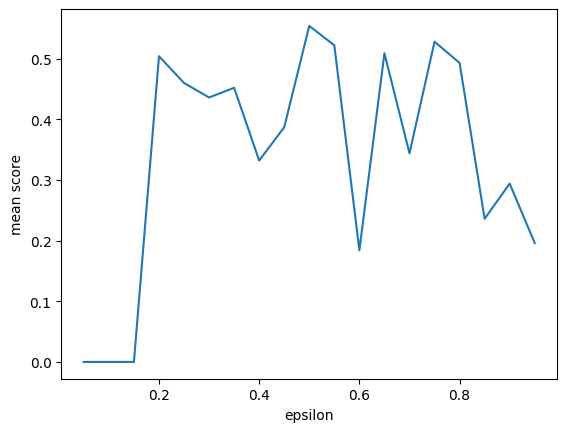

In [43]:
lake_map = generate_random_map(size=6)
env1 = FrozenLakeEnv(desc=lake_map, is_slippery=True)
epsilons_list = np.arange(0.05, 1, 0.05)
results = []
print('eps\tscore\titerations\ttime')
for eps in epsilons_list:
    start_time = time()
    Q, pi, i = on_policy_eps_greedy_monte_carlo(env1, eps, gamma=0.6)
    s = evaluate_empiricaly(env1, pi)
    print(f"{eps:.2f}\t{s:.3f}\t{i}\t{time() - start_time:.3f}")
    results.append(s)

plt.plot(epsilons_list, results)
plt.xlabel('epsilon')
plt.ylabel('mean score')
plt.show()

In [50]:
env1 = FrozenLakeEnv(desc=lake_map, is_slippery=True)
env2 = FrozenLakeEnv(desc=lake_map, is_slippery=True)
env3 = FrozenLakeEnv(desc=lake_map, is_slippery=False)

for s in env.P:
    for a in env.P[s]:
        for prob, next_state, reward, done in env.P[s][a]:
            if reward == 0.0 and done == True:
                env.P[s][a] = [(prob, next_state, -5.0, done)]
            if reward == 1.0:
                env.P[s][a] = [(prob, next_state, 5.0, done)]
            if reward == 0.0:
                env.P[s][a] = [(prob, next_state, -0.1, done)]

for name, env, test_env in [('original', env1, env1), ('modified', env2, env1), ('deterministic', env3, env3)]:
    print('Environment type:', name)
    Q, pi, it = value_iteration(env.P, gamma = 0.9)
    result = evaluate_empiricaly(test_env, pi)
    print('Value iteration results: ')
    print('iterations =', it)
    print('result =', result)

    Q, pi, it = on_policy_eps_greedy_monte_carlo(env, eps=0.5, gamma=0.6, timeout=120)
    result = evaluate_empiricaly(test_env, pi)
    print('Epsilon-greedy Monte Carlo results: ')
    print('iterations =', it)
    print('result =', result)


Environment type: original
Value iteration results: 
iterations = 26
result = 0.9980000000000003
Epsilon-greedy Monte Carlo results: 
iterations = 10290
result = 0.12399999999999997
Environment type: modified
Value iteration results: 
iterations = 26
result = 0.9939999999999997
Epsilon-greedy Monte Carlo results: 
iterations = 19274
result = 0.5769999999999995
Environment type: deterministic
Value iteration results: 
iterations = 11
result = 1.0
Epsilon-greedy Monte Carlo results: 
iterations = 47323
result = 1.0
